In [1]:
import numpy as np
from Layers import *
from Modelling import *
import os
import struct

def _onehot(y, n_classes):
        onehot = np.zeros((y.shape[0],n_classes))
        for idx, val in enumerate(y.astype(int)):
            onehot[idx][val] = 1
        return onehot


def load_mnist(path, kind ='train'):
    labels_path = os.path.join(path,"%s-labels.idx1-ubyte" %kind)
    images_path = os.path.join(path,"%s-images.idx3-ubyte" %kind)

    with open(labels_path,'rb') as lb_path:
        magic,n = struct.unpack(">II",lb_path.read(8)) # >(Big Endian) integer, integer 
        labels = np.fromfile(lb_path, dtype=np.uint8)
    
    with open(images_path,'rb') as im_path:
        magic, num, rows, cols = struct.unpack(">IIII",im_path.read(16))
        images  = np.fromfile(im_path,dtype=np.uint8).reshape(len(labels),784)
        images = ((images/255.0) - 0.5)*2

    return images, labels

X_train, y_train = load_mnist("C:\\Users\\Pratham Kundan\\Desktop\\Directory\\Python\\Machine Learning\\Neural Network Library\\Data", kind = 'train')

y_train_enc = _onehot(y_train, np.unique(y_train).shape[0])

print(X_train.shape)

network = [
    Layer(n_x=784, n_y = 100, eta=0.01),
    Activation(function = 'sigmoid'),
    Layer(n_x = 100, n_y = 10, eta=0.01),
    Activation(function = 'sigmoid')
]

err = fit(model = network, X_train= X_train,Y_train= y_train_enc, epochs=200, batch_size= 100, error_fun='bel')



(60000, 784)


Epoch 200 of 200	Error:-347.464

In [2]:

ans = 0
for i in range(X_train.shape[0]):
    z = predict(model=network, X = [X_train[i]])
    pred = np.argmax(y_train_enc[i])
    if (np.argmax(z) == pred): ans+=1
    if (i<10): print("Predicted:",np.argmax(z),"\tactual:",pred)
print("Accuracy: %.2f%%" %(ans/X_train.shape[0]*100))

Predicted: 5 	actual: 5
Predicted: 0 	actual: 0
Predicted: 4 	actual: 4
Predicted: 1 	actual: 1
Predicted: 9 	actual: 9
Predicted: 2 	actual: 2
Predicted: 1 	actual: 1
Predicted: 3 	actual: 3
Predicted: 1 	actual: 1
Predicted: 4 	actual: 4
Accuracy: 91.57%


In [6]:
X_test, y_test = load_mnist("C:\\Users\\Pratham Kundan\\Desktop\\Directory\\Python\\Machine Learning\\Neural Network Library\\Data", kind = 't10k')
y_test_enc = _onehot(y_test, np.unique(y_test).shape[0])
ans = 0
for i in range(X_test.shape[0]):
    z = predict(model=network, X = [X_test[i]])
    pred = np.argmax(y_test_enc[i])
    if (np.argmax(z) == pred): ans+=1
    if (i<10): print("Predicted:",np.argmax(z),"\tactual:",pred)
print("Accuracy: %.2f%%" %(ans/X_test.shape[0]*100))

Predicted: 7 	actual: 7
Predicted: 2 	actual: 2
Predicted: 1 	actual: 1
Predicted: 0 	actual: 0
Predicted: 4 	actual: 4
Predicted: 1 	actual: 1
Predicted: 4 	actual: 4
Predicted: 9 	actual: 9
Predicted: 6 	actual: 5
Predicted: 9 	actual: 9
Accuracy: 90.89%


In [ ]:
# :) Not bad

In [1]:
import numpy as np
from Layers import *
from Modelling import *
import os
import struct

def _onehot(y, n_classes):
        onehot = np.zeros((y.shape[0],n_classes))
        for idx, val in enumerate(y.astype(int)):
            onehot[idx][val] = 1
        return onehot


def load_mnist(path, kind ='train'):
    labels_path = os.path.join(path,"%s-labels.idx1-ubyte" %kind)
    images_path = os.path.join(path,"%s-images.idx3-ubyte" %kind)

    with open(labels_path,'rb') as lb_path:
        magic,n = struct.unpack(">II",lb_path.read(8)) # >(Big Endian) integer, integer 
        labels = np.fromfile(lb_path, dtype=np.uint8)
    
    with open(images_path,'rb') as im_path:
        magic, num, rows, cols = struct.unpack(">IIII",im_path.read(16))
        images  = np.fromfile(im_path,dtype=np.uint8).reshape(len(labels),28,28)
        images = ((images/255.0) - 0.5)*2

    return images, labels

X_train, y_train = load_mnist("C:\\Users\\Pratham Kundan\\Desktop\\Directory\\Python\\Machine Learning\\Neural Network Library\\Data", kind = 'train')
y_train_enc = _onehot(y_train, np.unique(y_train).shape[0])
print(X_train.shape)

(60000, 28, 28)


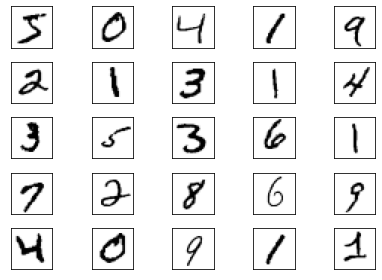

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=5, ncols=5, sharex = True, sharey= True)
ax = ax.flatten()

for i in range(25):
    img = X_train[i]
    ax[i].imshow(img, cmap = "Greys")

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
nn = [
    Convolutional((1,28,28),(3,3),5),
    Activation('sigmoid'),
    Reshape((5,26,26), (1,(5*26*26))),
    Layer(5*26*26, 100),
    Activation('sigmoid'),
    Layer(100,10),
    Activation('sigmoid')
]

errors = fit(nn, X_train ,y_train_enc ,epochs = 20 , shuffle= False ,error_fun='bel', batch_size=1)

In [9]:
ans = 0
for i in range(X_train.shape[0]):
    z = predict(model=nn, X = [X_train[i]])
    pred = np.argmax(y_train_enc[i])
    if (np.argmax(z) == pred): ans+=1
    if (i<10): print("Predicted:",np.argmax(z),"\tactual:",pred)
print("Accuracy: %.2f%%" %(ans/X_train.shape[0]*100))

Predicted: 8 	actual: 5
Predicted: 0 	actual: 0
Predicted: 4 	actual: 4
Predicted: 2 	actual: 1
Predicted: 4 	actual: 9
Predicted: 2 	actual: 2
Predicted: 2 	actual: 1
Predicted: 8 	actual: 3
Predicted: 2 	actual: 1
Predicted: 7 	actual: 4
Accuracy: 40.56%
